GPU available


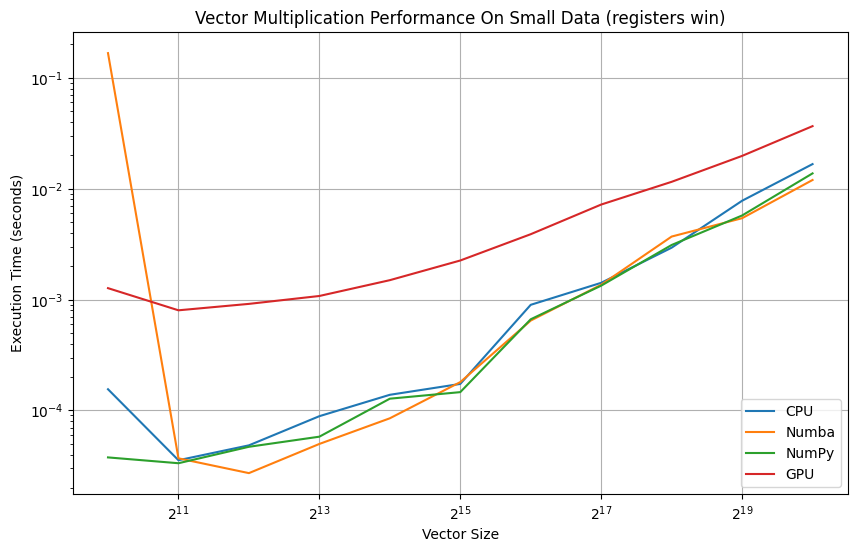

In [2]:
import numpy as np
import time
from numba import njit, vectorize
import matplotlib.pyplot as plt
import torch

# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU available")
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU")


# Vector sizes to test
vector_sizes = [2**i for i in range(10, 21)]

# Function for CPU vector multiplication
def cpu_vector_mult(a, b):
  return a * b

# Numba-optimized CPU vector multiplication
@njit(fastmath=True)  # Enable fast math for potential speedups
def numba_cpu_vector_mult(a, b):
  return a * b

# NumPy's vectorized multiplication (already optimized)
def numpy_vector_mult(a, b):
  return np.multiply(a, b)

# GPU vector multiplication using PyTorch
def gpu_vector_mult(a, b):
  return a * b


# Store execution times
cpu_times = []
numba_times = []
numpy_times = []
gpu_times = []

for size in vector_sizes:
    a = np.random.rand(size)
    b = np.random.rand(size)

    # CPU
    start = time.time()
    for _ in range(10):
      cpu_vector_mult(a,b)
    end = time.time()
    cpu_times.append(end-start)

    # Numba
    start = time.time()
    for _ in range(10):
      numba_cpu_vector_mult(a, b)
    end = time.time()
    numba_times.append(end - start)

    # NumPy
    start = time.time()
    for _ in range(10):
      numpy_vector_mult(a,b)
    end = time.time()
    numpy_times.append(end-start)

    # GPU
    if torch.cuda.is_available():
      start = time.time()
      for _ in range(10):
        a_gpu = torch.tensor(a, device=device)
        b_gpu = torch.tensor(b, device=device)
        gpu_vector_mult(a_gpu, b_gpu)
      end = time.time()
      gpu_times.append(end - start)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(vector_sizes, cpu_times, label='CPU')
plt.plot(vector_sizes, numba_times, label='Numba')
plt.plot(vector_sizes, numpy_times, label='NumPy')

if torch.cuda.is_available():
    plt.plot(vector_sizes, gpu_times, label='GPU')

plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel('Vector Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Vector Multiplication Performance On Small Data (registers win)')
plt.legend()
plt.grid(True)
plt.show()


GPU available


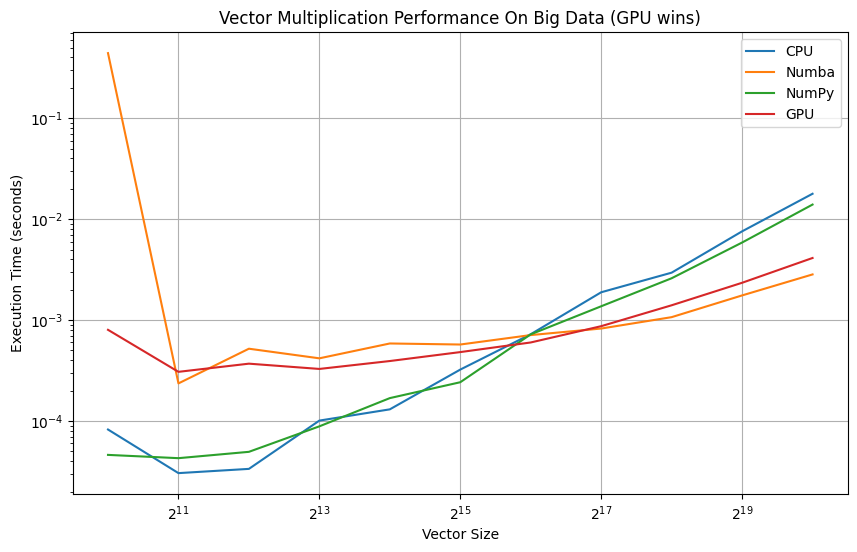

In [3]:
import numpy as np
import time
from numba import njit, vectorize
import matplotlib.pyplot as plt
import torch

# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU available")
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU")


# Vector sizes to test
vector_sizes = [2**i for i in range(10, 21)]

# Function for CPU vector multiplication
def cpu_vector_mult(a, b):
  return a * b

# Numba-optimized CPU vector multiplication
@njit(fastmath=True,parallel=True)  # Enable fast math for potential speedups
def numba_cpu_vector_mult(a, b):
  return a * b

# NumPy's vectorized multiplication (already optimized)
def numpy_vector_mult(a, b):
  return np.multiply(a, b)

# GPU vector multiplication using PyTorch
def gpu_vector_mult(a, b):
  return a * b


# Store execution times
cpu_times = []
numba_times = []
numpy_times = []
gpu_times = []

for size in vector_sizes:
    a = np.random.rand(size)
    b = np.random.rand(size)

    # CPU
    start = time.time()
    for _ in range(10):
      cpu_vector_mult(a,b)
    end = time.time()
    cpu_times.append(end-start)

    # Numba
    start = time.time()
    for _ in range(10):
      numba_cpu_vector_mult(a, b)
    end = time.time()
    numba_times.append(end - start)

    # NumPy
    start = time.time()
    for _ in range(10):
      numpy_vector_mult(a,b)
    end = time.time()
    numpy_times.append(end-start)

    # GPU
    if torch.cuda.is_available():
      start = time.time()
      a_gpu = torch.tensor(a, device=device)
      b_gpu = torch.tensor(b, device=device)
      for _ in range(10):
        gpu_vector_mult(a_gpu, b_gpu)
      end = time.time()
      gpu_times.append(end - start)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(vector_sizes, cpu_times, label='CPU')
plt.plot(vector_sizes, numba_times, label='Numba')
plt.plot(vector_sizes, numpy_times, label='NumPy')

if torch.cuda.is_available():
    plt.plot(vector_sizes, gpu_times, label='GPU')

plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel('Vector Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Vector Multiplication Performance On Big Data (GPU wins)')
plt.legend()
plt.grid(True)
plt.show()
